## TASK 2 : Sales prediction using python
### OBJECTIVE : Use the advertising dataset and analyse the relationship between 'TV advertising' and 'sales' using python.
## >>......Let's Begin......<<
### Import the libraries
:>Let's import some necessary librares required for archiving the objective of this task.

In [1]:
# Importing necessary libraries for the data model
# Importing numpy for numerical computing array manipulation, mathematical operations etc.
import numpy as np

# Importing Pandas for data cleaning and analysis
import pandas as pd

# Importing the pyplot module from the Matplotlib library, which provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt

# Importing seaborn which is data visualization library
import seaborn as sns

# Setting up a filter to ignore all warnings messages
import warnings
warnings.filterwarnings('ignore')

# Print a message after successfully importing modules and packages
print("...... ALL REQUIREMENTS IMPORTED SUCCESSFULLY ......")

...... ALL REQUIREMENTS IMPORTED SUCCESSFULLY ......


### About the dataset
Here, we are given TV, Radio and Newspaper advertisements and based on that advertisements, sales are given. We have to train a machine learning model for the task to predict the sales on basis of advertisement.
### Import the Dataset

In [2]:
# Loading Data set as a pandas dataframe
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data Analysis
:> Now let’s have a look at the first and last five rows of this dataset:

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
# Getting the number of rows and columns in the data set

print("There are ",df.shape[0],"rows in our dataset.")
print("There are ",df.shape[1],"columns in our dataset.")

There are  200 rows in our dataset.
There are  4 columns in our dataset.


:> Let's check quick statistical summary of numerical of our DataFrame

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# To know data types of each column, the number of non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# To know any null value is present or not
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

:> Here in our datasetn no null value is there. So, our dataset is already clean dataset
### Data Visualization

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
# Drop the 'Sales' column and plot for rest of the dataset
a=df.drop(columns=['Sales'])
a.head(2)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


:> Let's plot some graphs using matplotlib and seaborn for the visualization of ta data

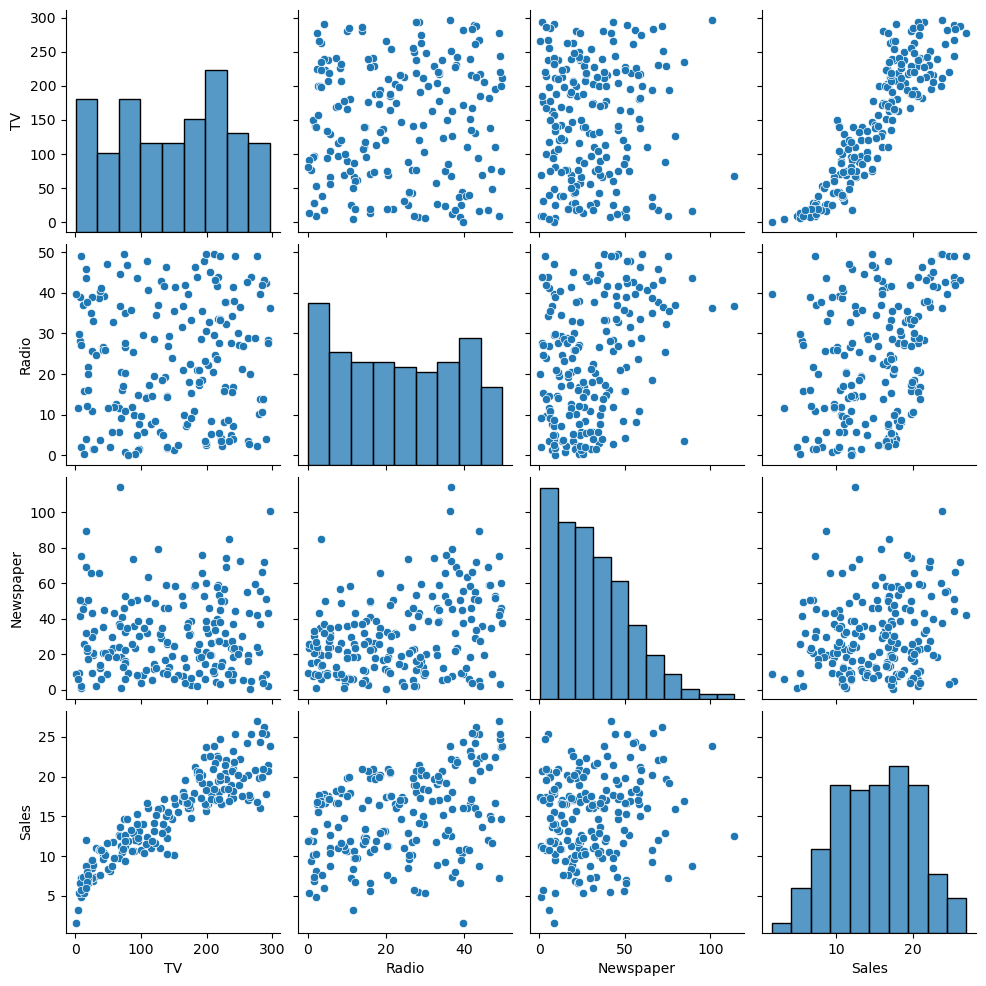

In [11]:
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

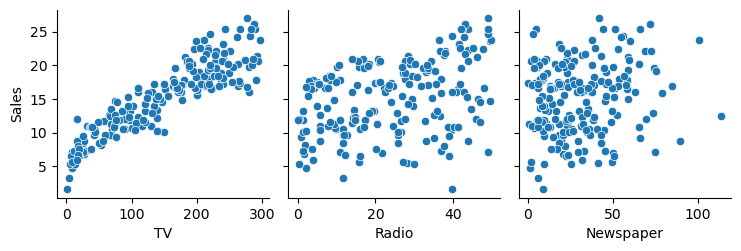

In [12]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show

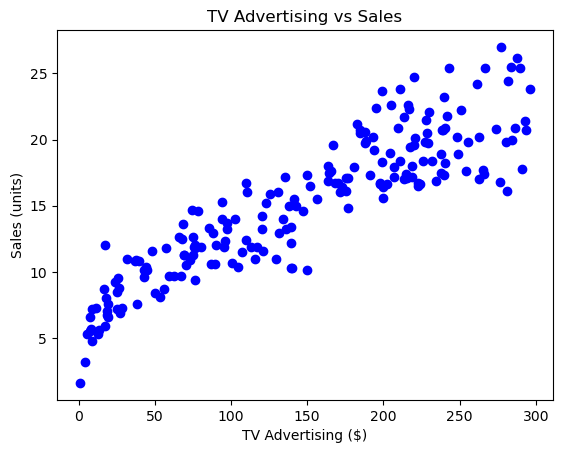

In [13]:
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales (units)')
plt.show()

In [14]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: ylabel='Frequency'>

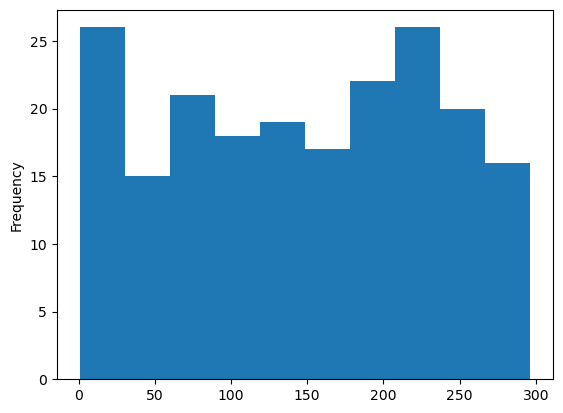

In [15]:
df['TV'].plot.hist()

<Axes: ylabel='Frequency'>

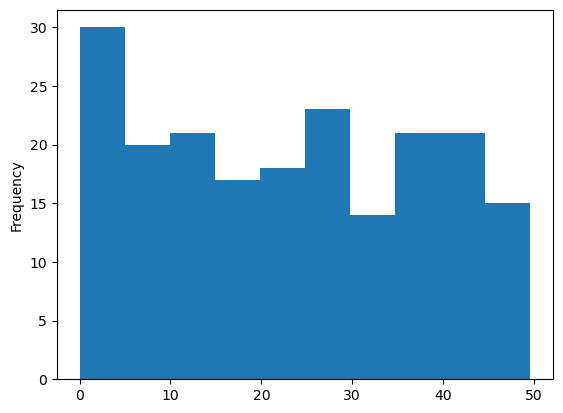

In [16]:
df['Radio'].plot.hist()

<Axes: ylabel='Frequency'>

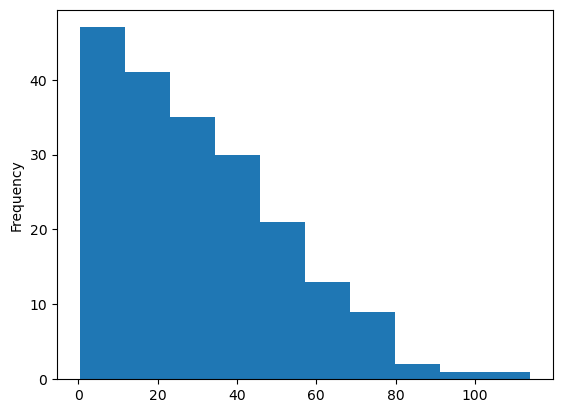

In [17]:
df['Newspaper'].plot.hist()

:> We have observed from the above plots,
> Each category is ploted against each other

> The advertising for TV is highly effecting with Sales

> While Radio Advertisements have an average impact whereas Newspaper advertisements aren't effecting much on sales.

:> Let's have a look on the combined graph of the data

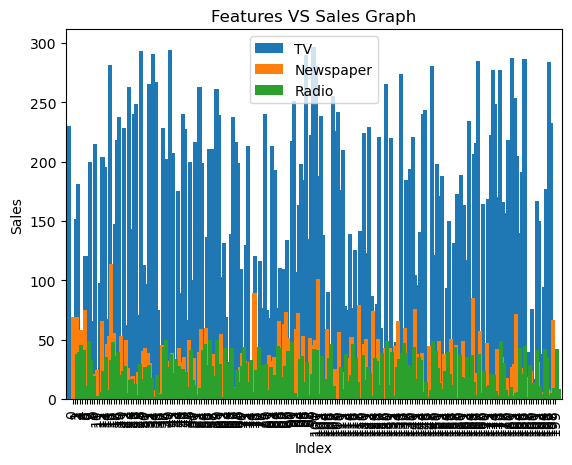

In [18]:
# Grouped bar graph from dataset
graph = df[['TV','Newspaper','Radio']].plot(kind='bar',width=5)

# Labels and title for the graph
graph.set_xlabel('Index')
graph.set_ylabel('Sales')
graph.set_title('Features VS Sales Graph')
# Here features refers to TV Radio And Newspaper
plt.show()

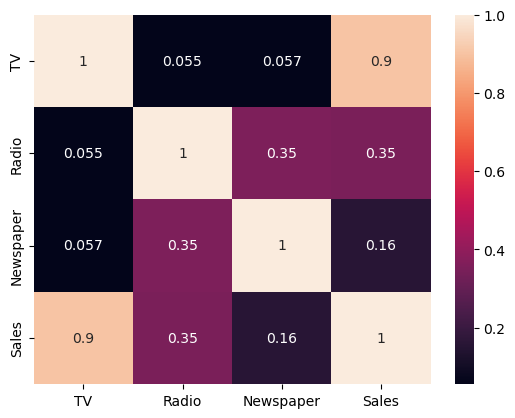

In [19]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), annot = True)
plt.show()

:> From above visualizations, we have observed that 'TV' advertisements are having high impact on the sales. Let's train our model with the 'Tv' data.

### Feature Selection for the model

:> As we initially have four columns, we have taken 'TV' column as 'x' variable and 'sales' as 'y' variable

In [20]:
X = df[['TV']]
y = df[['Sales']]

In [21]:
X.head(2)

,TV
0,230.1
1,44.5


In [22]:
y.head(2)

,Sales
0,22.1
1,10.4


In [23]:
print("Rows and columns for 'X' variable :: ",X.shape)

Rows and columns for 'X' variable ::  (200, 1)


In [24]:
print("Rows and columns for 'y' variable :: ",y.shape)

Rows and columns for 'y' variable ::  (200, 1)


### Training the model
Using 'scikit-learn library', splitting the dataset into train and test data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [27]:
# Let's now take a look at the train dataset
X_train.head(2)

,TV
169,284.3
97,184.9


In [28]:
y_train.head(2)

,Sales
169,20.0
97,20.5


In [29]:
print("Rows and Columns for 'x_train' :: ",X_train.shape)
print("Rows and Columns for 'y_train' :: ",y_train.shape)

Rows and Columns for 'x_train' ::  (140, 1)
Rows and Columns for 'y_train' ::  (140, 1)


In [30]:
X_test.head(2)

,TV
95,163.3
15,195.4


In [31]:
y_test.head(2)

,Sales
95,16.9
15,22.4


In [32]:
print("Rows and Columns for 'x_test' :: ",X_test.shape)
print("Rows and Columns for 'y_test' :: ",y_test.shape)

Rows and Columns for 'x_test' ::  (60, 1)
Rows and Columns for 'y_test' ::  (60, 1)


## Using Machine Learning Algorithm
### Logistic Regression :
>Logistic Regression is used for binary classification tasks in machine learning. Despite its name, it's primarily used for classification rather than regression. It's a type of regression analysis where the dependent variable is categorical, which means it takes on only two values, such as 0 and 1, or "yes" and "no".

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
# Model Fitting
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Checking the accuracy of the model
accuracy = model.score(X_test,y_test)*100
print("Model has predicted ",accuracy,"% accurately.")

Model has predicted  81.4855389208679 % accurately.


### Moedel Evaluation

In [36]:
prediction = model.predict(X_test)

In [37]:
prediction

array([[16.16109107],
       [17.92129084],
       [23.26769201],
       [ 7.84812269],
       [19.28667945],
       [11.32465432],
       [19.09475735],
       [ 9.94829874],
       [19.4018327 ],
       [16.8081427 ],
       [ 8.93385339],
       [10.28827502],
       [20.0653348 ],
       [ 7.50266292],
       [14.85602084],
       [16.53945177],
       [ 7.6068492 ],
       [18.04192759],
       [11.3356213 ],
       [20.22435596],
       [19.79116038],
       [10.92435967],
       [ 9.29028013],
       [20.96462689],
       [10.99016153],
       [10.14022083],
       [18.91380224],
       [14.84505386],
       [11.98815642],
       [ 7.66716757],
       [18.16256433],
       [11.00112851],
       [18.11321294],
       [ 8.13326408],
       [22.59870643],
       [20.26822387],
       [ 9.85507944],
       [22.21486224],
       [13.63320293],
       [ 8.71451385],
       [13.56740107],
       [16.91232898],
       [ 9.56993804],
       [10.62276781],
       [19.48956852],
       [ 9

### Visualizing the prediction

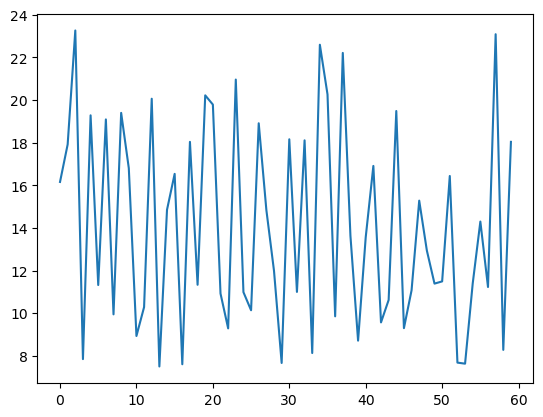

In [38]:
plt.plot(prediction)

<function matplotlib.pyplot.show(close=None, block=None)>

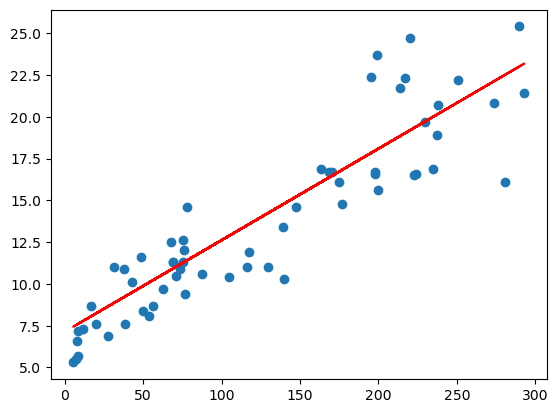

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test,7.14382225 + 0.05473199 * X_test,'r')
plt.show

## >>....END OF THE TASK....<<
####                            -DHARMVIR SINGH